# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf 

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="200px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

#### Solución

Sean:
- $x_A$: la cantidad de gramos de A a ser producidas, y
- $x_B$: la cantidad de gramos de B a ser producidas en la semana.

Notar que lo que se quiere es minimizar $0.6x_A+0.2x_B$.

Restricciones:
1. El compuesto debe tener **al menos** $25 g$ de proteína: $30\%x_A+5\%x_B\geq 25 \Rightarrow 0.3x_A+0.05x_B\geq 25$.
2. El compuesto debe tener **al menos** $6 g$ de grasa: $1\%x_A+7\%x_B\geq 6 \Rightarrow 0.01x_A+0.07x_B\geq 6$.
3. El compuesto debe tener **al menos** $30 g$ de azúcares: $10\%x_A+10\%x_B\geq 30 \Rightarrow 0.1x_A+0.1x_B\geq 30$.

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_A,x_B} & 0.6x_A+0.2x_B \\
\text{s. a. }  & -0.3x_A-0.05x_B\leq -25 \\
               & -0.01x_A-0.07x_B\leq -6 \\
               & -0.1x_A-0.1x_B\leq -30,
\end{array}
\end{equation}

o, eqivalentemente 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^\top\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

Preferiremos, en adelante, la notación vectorial/matricial.

Solución gráfica:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

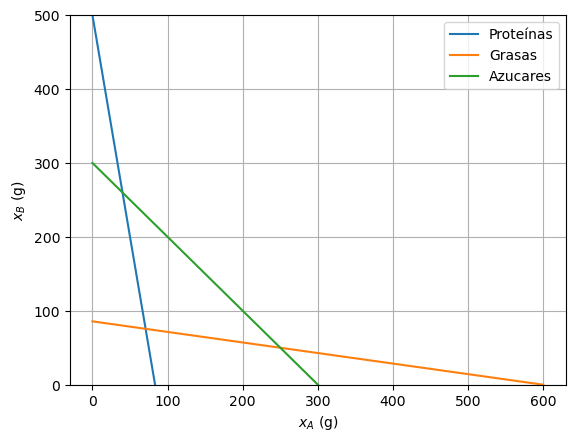

In [2]:
# Restricción de proteínas
def prote(xA):
    return (25-0.3*xA)/0.05 # xB

# Restricción de grasas
def grasa(xA):
    return (6-0.01*xA)/0.07 # xB

# Restricción de azucares
def azucar(xA):
    return (30-0.1*xA)/0.1

# Definimos el rango de la gráfica
xA=np.linspace(0,600,100)

# Gráfica de restricciones
plt.plot(xA,prote(xA),label='Proteínas')
plt.plot(xA,grasa(xA),label='Grasas')
plt.plot(xA,azucar(xA),label='Azucares')
plt.xlabel('$x_A$ (g)')
plt.ylabel('$x_B$ (g)')
plt.ylim([0,500])
plt.legend()
plt.grid()

In [3]:
# Evaluamos en 4 puntos donde se cumple al menos una restricción exactamente:
# p1: prote(xA=0)
# p2: prote(xA)=azucar(xA)
# p3: azucar(xA)=grasa(xA)
# p4: grasa(xA)=0
#
# Definimos el criterio de optimización
def costo(xA,xB):
    return 0.6*xA+0.2*xB

In [4]:
# p1:
0,prote(0)

(0, 500.0)

In [5]:
# Costo para p1
costo(0,500)

100.0

In [6]:
import sympy as sym

In [7]:
# p2:
sym.var('xA')
sym.solve(prote(xA)-azucar(xA),xA)

[40.0000000000000]

In [8]:
# xB, p2
prote(40),azucar(40)

(260.0, 260.0)

In [9]:
# Costo para p2
costo(40,260)

76.0

In [10]:
# p3:
sym.solve(azucar(xA)-grasa(xA),xA)

[250.000000000000]

In [11]:
# xB para p3:
azucar(250),grasa(250)

(50.0, 49.99999999999999)

In [12]:
# Costo para p3:
costo(250,50)

160.0

In [13]:
# p4:
sym.solve(grasa(xA),xA)

[600.000000000000]

In [14]:
# xB=0
costo(600,0)

360.0

**Resultado:**

La combinación óptima para minimizar el costo del compuesto nutritivo es **A**=40 gramos y **B**=260 gramos, con un valor de 76 u.m. 

In [15]:
xA=40
xB=260

0.3*xA+0.05*xB # Proteínas del compuesto nutritivo

25.0

In [16]:
0.1*xA+0.1*xB # Azucares

30.0

In [17]:
0.01*xA+0.07*xB # Grasas

18.6

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

**Solución:**

Definimos
* $a\rightarrow$ la cantidad de carrocerías de automóvil a fabricar.
* $c\rightarrow$ la cantidad de carrocerías de camión a fabricar.

Se desea maximizar la utilidad$\max_{a,c}600c+200a$, o de forma equivalente 
$$
\min_{a,c}-600c-200a.
$$
Bajo las restricciones de disponibilidad
* de la nave A: $7c+2a\leq300$
* de la nave B: $3c+3a\leq270$

---


#### Bueno, y una vez planteado, ¿cómo se resuelve el problema?



Este problema está sencillo pues solo es en dos variables. La solución gráfica es válida.

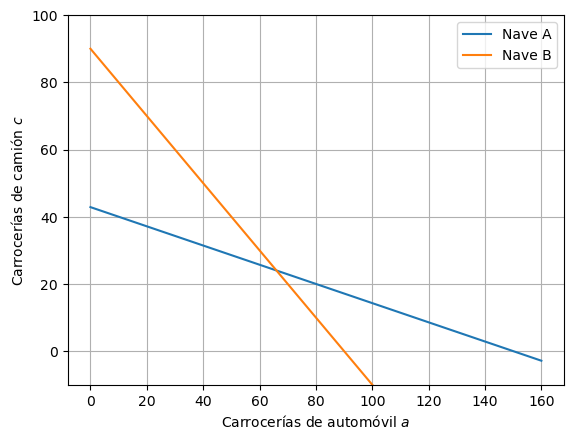

In [23]:
def A(a):
    c=(300-2*a)/7
    return c
def B(a):
    c=(270-3*a)/3
    return c
a=np.linspace(0,160,100)

plt.plot(a,A(a),label='Nave A')
plt.plot(a,B(a),label='Nave B')
plt.legend()
plt.ylim([-10,100])
plt.xlabel('Carrocerías de automóvil $a$')
plt.ylabel('Carrocerías de camión $c$')
plt.grid()

In [24]:
# Evaluamos 3 puntos en la función objetivo:
# p1: A(a=0)
# p2: A(a)=B(a)
# p3: B(a)=0
def obj(a,c):
    return 600*c+200*a

In [26]:
# p1:
a,c=0,A(0)
obj(a,c)

25714.285714285714

In [29]:
A(0) # Como c=43 ya no cumple la restricción de la Nave A, tomamos c=42

42.857142857142854

In [30]:
obj(0,42)

25200

In [27]:
# p2:
sym.var('a')
sym.solve(A(a)-B(a),a)

[66]

In [28]:
a,c=66,A(66)
obj(a,c)

27600.0

In [31]:
# p3:
sym.var('a')
sym.solve(B(a),a)

[90]

In [32]:
a,c=90,0
obj(a,c)

18000

In [33]:
# El punto óptimo es 'p2'
a,c=66,A(66)
a,c

(66, 24.0)

**Resultado:**

La ganancia máxima es 27600 u.m. y se consigue fabricando 66 carrocerías de auto y 24 carrocerías de camión.

Resolviendo el problema 2 (Maximización de utilidad en carros y camiones), con la función `linprog`

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/images/logo.svg" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [34]:
import scipy.optimize as opt

In [35]:
# opt?

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [38]:
opt.linprog?

In [41]:
# Problema de carrocerías
#
c=np.array([-600,-200]) # Coeficientes de la función a minimizar (Si los coeficientes son negativos, estamos maximizando)
A=np.array([[7,2],
            [3,3]])     # Lado izquierdo del sistema de inecuaciones (Resticciones con signo < )
b=np.array([300,270])   # Lado derecho del sistema de intecuaciones

sol=opt.linprog(c,A,b,method='highs')
sol

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -27600.0
       ineqlin:  marginals: array([-80.        , -13.33333333])
  residual: array([0., 0.])
         lower:  marginals: <MemoryView of 'ndarray' at 0x1893c5a3040>
  residual: array([24., 66.])
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: <MemoryView of 'ndarray' at 0x1893c59fd40>
  residual: array([inf, inf])
             x: array([24., 66.])

In [42]:
sol.x    # Valores que generan la solución óptima

array([24., 66.])

In [43]:
sol.fun  # Solución óptima (Si es negativo, estamos maximizando)

-27600.0

In [44]:
sol.slack # Excedente de las restricciones de desigualdad

array([0., 0.])

**Resultado:**

Se necesitan fabricar 24 carrocerías de camión y 66 de automóvil para obtener una ganancia de 27600 u.m.

---

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, comparte pantalla para explicarlo y le subiré la nota de alguna tarea a 100.**

---
**Solución:**
Se desea maximzar la utilidad: $15a+20c$, donde $a$ es la cantidad de par de aretes y $c$ es la cantidad de cadenas a fabricar.
$$
\min_{a,c}-15a-20c,
$$
bajo las restricciones:
* De tiempo: $0.5a+1c\leq10$ horas
* De material: $a+c\leq15$ unidades

In [45]:
# Función objetivo
c=np.array([-15,-20]) # [aretes,cadenitas]
A=np.array([[0.5,1],
            [1,1]])
b=np.array([10,15])
opt.linprog(c,A,b,method='highs')

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -250.0
       ineqlin:  marginals: array([-10., -10.])
  residual: array([0., 0.])
         lower:  marginals: <MemoryView of 'ndarray' at 0x1893c5a3380>
  residual: array([10.,  5.])
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: <MemoryView of 'ndarray' at 0x1893c5a31e0>
  residual: array([inf, inf])
             x: array([10.,  5.])

**Resultado:**

La utilidad máxima es de $\$250$ y se consigue fabricando 10 unidades de pares de aretes y 5 unidades de cadenas. Sobrando 0 horas de las disponibles y 0 unidades.

### 3.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`

- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

In [1]:
import numpy as np
import scipy.optimize as opt

C:\Users\carlo\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
c=np.array([0.6,0.2])      # Costos de los compuestos (xA,xB)
# Los coeficientes son negativos si la restricción tiene signo > 
A=np.array([[-0.3, -0.05], # Porcentaje de proteínas de los compuestos
            [-0.01,-0.07], # Porcentaje de grasas
            [-0.1, -0.1]]) # Porcentaje de azucares
b=np.array([-25,-6,-30])   # Límites de proteínas, grasas y azucares

opt.linprog(c,A,b,method='highs')

           con: array([], dtype=float64)
 crossover_nit: 0
           fun: 76.0
       message: 'Optimization terminated successfully.'
           nit: 2
         slack: array([ 0. , 12.6,  0. ])
        status: 0
       success: True
             x: array([ 40., 260.])

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos factorías A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada factoría a cada centro distribuidor son los  indicados  en la tabla  siguiente: 

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_1 + x_2 + x_3 \leq 500$
- $x_4 + x_5 + x_6 \leq 400$

Restricciones del consumo:

- $x_1 + x_4 \geq 200$
- $x_2 + x_5 \geq 300$
- $x_3 + x_6 \geq 400$

La función objetivo será:

$$\min_{x_1,\dots,x_6}50x_1 + 60x_2 + 10x_3 + 25x_4 + 40x_5 + 20x_6$$

Resolver con `linprog`

In [5]:
c=np.array([50,60,10,25,40,20])
A=np.array([[ 1, 1, 1, 0, 0, 0],
            [ 0, 0, 0, 1, 1, 1],
            [-1, 0, 0,-1, 0, 0],
            [ 0,-1, 0, 0,-1, 0],
            [ 0, 0,-1, 0, 0,-1]])
b=np.array([500,400,-200,-300,-400])

opt.linprog(c,A,b,method='highs')

           con: array([], dtype=float64)
 crossover_nit: 0
           fun: 23000.0
       message: 'Optimization terminated successfully.'
           nit: 4
         slack: array([0., 0., 0., 0., 0.])
        status: 0
       success: True
             x: array([  0., 100., 400., 200., 200.,   0.])

El costo mínimo de distribución es de 23000 u.m. Mandando:
* 100 unidades de **A** a **D**,
* 400 unidades de **A** a **E**,
* 200 unidades de **B** a **C** y
* 200 unidades de **B** a **D**.

## 5. Optimización de inversión en bonos

**Referencia:**

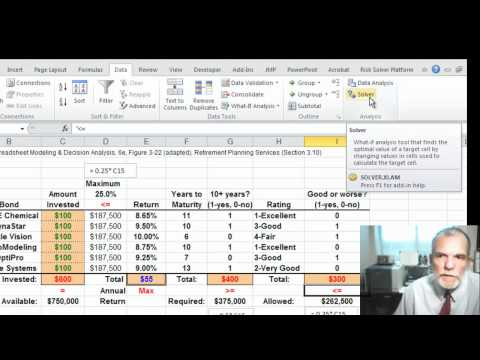

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

---
Definimos como $x_i$ la cantidad invertida en el bono $A_i$, para $i=\{1,2,\dots,6\}.

Las resticciones son:
* Bonos de madurez de 10 años o más: $x_1+x_2+x_4+x_6\geq375000$,
* Bonos de alto riesgo: $x_2+x_3+x_5\leq750000(35\%)$
* Cantidad fija de dinero: $x_1+x_2+x_3+x_4+x_5+x_6=750000$.

In [10]:
c=-np.array([0.0865,0.0950,0.1000,0.0875,0.0925,0.0900]) # Como vamos a maximizar, los coeficientes son negativos

# Restricciones de desigualdad
Au=np.array([[-1,-1, 0,-1, 0,-1],
             [ 0, 1, 1, 0, 1, 0]])
bu=np.array([-375000,0.35*750000])

# Restricción de igualdad
Ae=np.array([[1,1,1,1,1,1]])
be=np.array([750000])

sol=opt.linprog(c,Au,bu,Ae,be,bounds=(0,0.25*750000),method='highs')
sol

           con: array([0.])
 crossover_nit: 0
           fun: -68887.5
       message: 'Optimization terminated successfully.'
           nit: 3
         slack: array([187500.,      0.])
        status: 0
       success: True
             x: array([112500.,  75000., 187500., 187500.,      0., 187500.])

In [9]:
0.25*750000

187500.0

In [12]:
sol.x.sum()

750000.0

El retorno máximo es de $\$68887.5$ invirtiendo:
* 112500 en $A_1$,
* 75000 en $A_2$,
* 187500 en $A_3$, $A_4$ y $A_6$.
Excediendo por $\$187500$ la inversión en bonos de 10 años o más de madurez.